## GP Priors
- $f(x) = w^{\top} \phi(x) = \langle w, \phi(x) \rangle$
- in short $f(x)$ is a random function or distribution over functions

In [1]:
import numpy as np
from scipy.spatial import distance_matrix
from d2l import torch as d2l

d2l.set_figsize()

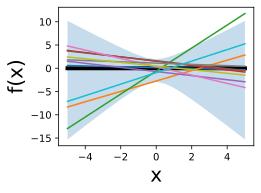

In [17]:
# eg: f(x) = (w_0, w_1) *(1, x)^T
def lin_func(x, n_samples):
    preds = np.zeros((n_samples, x.shape[0]))
    for ii in range(n_samples):
        w = np.random.normal(0, 1, 2) # sample 2 numbers randomly from N(0, 1)
        y = w[0] + w[1] * x
        preds[ii, :] = y
    return preds
    
    
x_points = np.linspace(-5, 5, 50)
outs = lin_func(x_points, 10)
lw_bd = -3 * np.sqrt((1 + x_points ** 2))
up_bd = 2 * np.sqrt((1 + x_points ** 2))

d2l.plt.fill_between(x_points, lw_bd, up_bd, alpha=0.25)
d2l.plt.plot(x_points, np.zeros(len(x_points)), linewidth=4, color='black')
d2l.plt.plot(x_points, outs.T)
d2l.plt.xlabel("x", fontsize=20)
d2l.plt.ylabel("f(x)", fontsize=20)
d2l.plt.show()

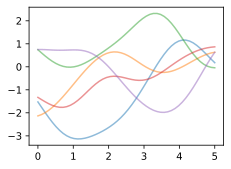

In [35]:
def rbfkernel(x1, x2, ls=4.): #@save
    dist = distance_matrix(np.expand_dims(x1, 1), np.expand_dims(x2, 1)) # 50, 
    return np.exp(-(1. / ls / 2) * (dist ** 2))
x_points = np.linspace(0, 5, 50)
meanvec = np.zeros(len(x_points))
covmat = rbfkernel(x_points, x_points, 1)

prior_samples = np.random.multivariate_normal(meanvec, covmat, size=5)
d2l.plt.plot(x_points, prior_samples.T, alpha=.5)
d2l.plt.show()